In [1]:
###Import libraries
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd 
import random
import math
import time
import datetime
%matplotlib inline

In [2]:
###Select yesterday date as report provide figures for the day before
from datetime import date, timedelta
file_date = str((date.today() - timedelta(days = 1)).strftime('%m-%d-%Y'))
file_date

'04-01-2020'

In [3]:
###Select data path
github_dir_path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
file_path = github_dir_path  + file_date + '.csv'

In [4]:
###Import the data
df = pd.read_csv(file_path, error_bad_lines=False)

In [5]:
###Let's look at the  dataframe
df.head()

FIPS     Admin2  Province_State Country_Region          Last_Update  \
0  45001.0  Abbeville  South Carolina             US  2020-04-01 21:58:49   
1  22001.0     Acadia       Louisiana             US  2020-04-01 21:58:49   
2  51001.0   Accomack        Virginia             US  2020-04-01 21:58:49   
3  16001.0        Ada           Idaho             US  2020-04-01 21:58:49   
4  19001.0      Adair            Iowa             US  2020-04-01 21:58:49   

         Lat       Long_  Confirmed  Deaths  Recovered  Active  \
0  34.223334  -82.461707          4       0          0       0   
1  30.295065  -92.414197         47       1          0       0   
2  37.767072  -75.632346          7       0          0       0   
3  43.452658 -116.241552        195       3          0       0   
4  41.330756  -94.471059          1       0          0       0   

                    Combined_Key  
0  Abbeville, South Carolina, US  
1          Acadia, Louisiana, US  
2         Accomack, Virginia, US  
3                 Ada, Idaho, US  
4                Adair, Iowa, US

In [6]:
###Let's check if the dataframe contains NaN values
df.isna().any()

FIPS               True
Admin2             True
Province_State     True
Country_Region    False
Last_Update       False
Lat                True
Long_              True
Confirmed         False
Deaths            False
Recovered         False
Active            False
Combined_Key      False
dtype: bool

In [7]:
###Let's replace NaN values by 0
df.fillna(0, inplace=True)

In [8]:
df.head()

FIPS     Admin2  Province_State Country_Region          Last_Update  \
0  45001.0  Abbeville  South Carolina             US  2020-04-01 21:58:49   
1  22001.0     Acadia       Louisiana             US  2020-04-01 21:58:49   
2  51001.0   Accomack        Virginia             US  2020-04-01 21:58:49   
3  16001.0        Ada           Idaho             US  2020-04-01 21:58:49   
4  19001.0      Adair            Iowa             US  2020-04-01 21:58:49   

         Lat       Long_  Confirmed  Deaths  Recovered  Active  \
0  34.223334  -82.461707          4       0          0       0   
1  30.295065  -92.414197         47       1          0       0   
2  37.767072  -75.632346          7       0          0       0   
3  43.452658 -116.241552        195       3          0       0   
4  41.330756  -94.471059          1       0          0       0   

                    Combined_Key  
0  Abbeville, South Carolina, US  
1          Acadia, Louisiana, US  
2         Accomack, Virginia, US  
3                 Ada, Idaho, US  
4                Adair, Iowa, US

In [9]:
# Let's remove columns we don't need for the moment
df_countries = df.drop(['FIPS','Lat','Long_','Admin2','Province_State','Last_Update','Combined_Key'], axis=1)

In [10]:
### Group datas by Country
df_countries=df_countries.groupby('Country_Region').sum()

In [11]:
### Sort the 15 top countries by Confirmed cases
df_countries.sort_values(['Confirmed'], ascending=False, axis=0, inplace=True)
# get the top 15 entries
df_countries_top15 = df_countries.head(15)
###Index columns as DataFrame series
cols = df_countries_top15.keys()
df_countries_top15.head(15)

Confirmed  Deaths  Recovered  Active
Country_Region                                      
US                 213372    4757       8474       0
Italy              110574   13155      16847   80572
Spain              104118    9387      22647   72084
China               82361    3316      76405    2640
Germany             77872     920      18700   58252
France              57749    4043      11053   42653
Iran                47593    3036      15473   29084
United Kingdom      29865    2357        179   27329
Switzerland         17768     488       2967   14313
Turkey              15679     277        333   15069
Belgium             13964     828       2132   11004
Netherlands         13696    1175        260   12261
Austria             10711     146       1436    9129
Korea, South         9887     165       5567    4155
Canada               9560     109       1324       0

In [12]:
###Some Active data are missing , so I let's do the maths add them to the Active column
pd.options.mode.chained_assignment = None
df_countries_top15['Active'] = df_countries_top15['Confirmed'] - (df_countries_top15['Recovered'] + df_countries_top15 ['Deaths'])

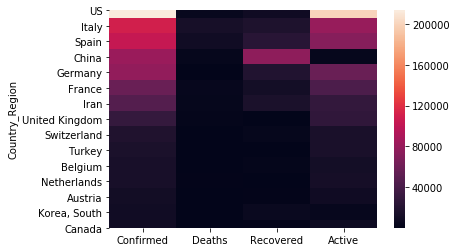

In [13]:
ax = sns.heatmap(df_countries_top15)

In [14]:
df_countries_top15.describe()

Confirmed        Deaths     Recovered         Active
count      15.000000     15.000000     15.000000      15.000000
mean    54317.933333   2943.933333  12253.133333   39120.866667
std     56647.739589   3772.078292  19298.019354   51039.229633
min      9560.000000    109.000000    179.000000    2640.000000
25%     13830.000000    382.500000   1380.000000   10066.500000
50%     29865.000000   1175.000000   5567.000000   15069.000000
75%     80116.500000   3679.500000  16160.000000   50452.500000
max    213372.000000  13155.000000  76405.000000  200141.000000

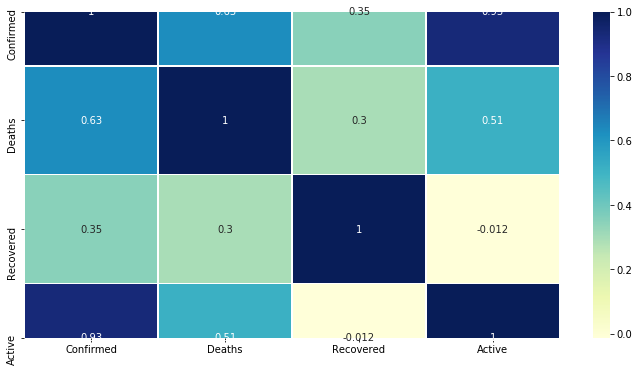

In [15]:
ax = plt.subplots(figsize=(12,6))
sns.heatmap(df_countries_top15.corr(), annot=True, linewidths=.5, cmap="YlGnBu")

In [16]:
# plotting configurations
%config InlineBackend.figure_format = 'retina'
plt.rc('figure', dpi=300)
plt.rc('savefig', dpi=300)
fig_size = (12,6)
big_fig_size = (18,8)
fig_fc = '#ffffff'
pc = ["#4285f4", "#db4437", "#f4b400", "#0f9d58", "#ab47bc", "#00acc1", "#ff7043", 
      "#9e9d24", "#5c6bc0", "#f06292", "#00796b", "#c2185b", "#7e57c2", "#03a9f4", 
      "#8bc34a", "#fdd835", "#fb8c00", "#8d6e63", "#9e9e9e", "#607d8b"]

def plot_conf(ax, xlbl='', ylbl='', t=''):
    """
    This function perform operations to produce better-looking visualizations
    """
    # changing the background color of the plot
    ax.set_facecolor('#ffffff')
    # modifying the ticks on plot axes
    ax.tick_params(axis='both', labelcolor='#616161', color='#ffffff')
    ax.tick_params(axis='both', which='major', labelsize=9)
    # adding a grid and specifying its color
    ax.grid(True, color='#e9e9e9')
    # making the grid appear behind the graph elements
    ax.set_axisbelow(True)
    # hiding axes
    ax.spines['bottom'].set_color('#ffffff')
    ax.spines['top'].set_color('#ffffff') 
    ax.spines['right'].set_color('#ffffff')
    ax.spines['left'].set_color('#ffffff')
    # setting the title, x label, and y label of the plot
    ax.set_title(t, fontsize=14, color='#616161', loc='left', pad=24, fontweight='bold');
    ax.set_xlabel(xlbl, labelpad=16, fontsize=11, color='#616161', fontstyle='italic');
    ax.set_ylabel(ylbl, color='#616161', labelpad=16, fontsize=11, fontstyle='italic');
    
# table configuration
styles = [
    dict(selector="td, th", props=[("border", "1px solid #333"), ("padding", "2px")]),
    dict(selector="th.col_heading", props=[("background", "#eee8d5"), ("color", "#b58900"), ("padding", "5px 8px")]),
    dict(selector="th.index_name", props=[("background", "#eee8d5"), ("color", "#268bd2"), ("padding", "5px 8px")]),
    dict(selector="th.blank", props=[("background", "#eee8d5"), ("color", "#268bd2"), ("padding", "0")]),
    dict(selector="th.row_heading.level0", props=[("background", "rgba(133, 153, 0, 0.1)")]),
    dict(selector="th.row_heading.level1", props=[("background", "rgba(42, 161, 152, 0.1)")]),
    dict(selector="thead tr:nth-child(2) th", props=[("border-bottom", "3px solid #333333")]),
    dict(selector="td:hover", props=[("font-weight", "bold"), ("background", "#002b36"), ("color", "Gold")]),
]

disp_fmt = "<h2 style='color: #b58900'>{}<span style='color: #FF91CE; font-size: 115%'>:</span></h2>"

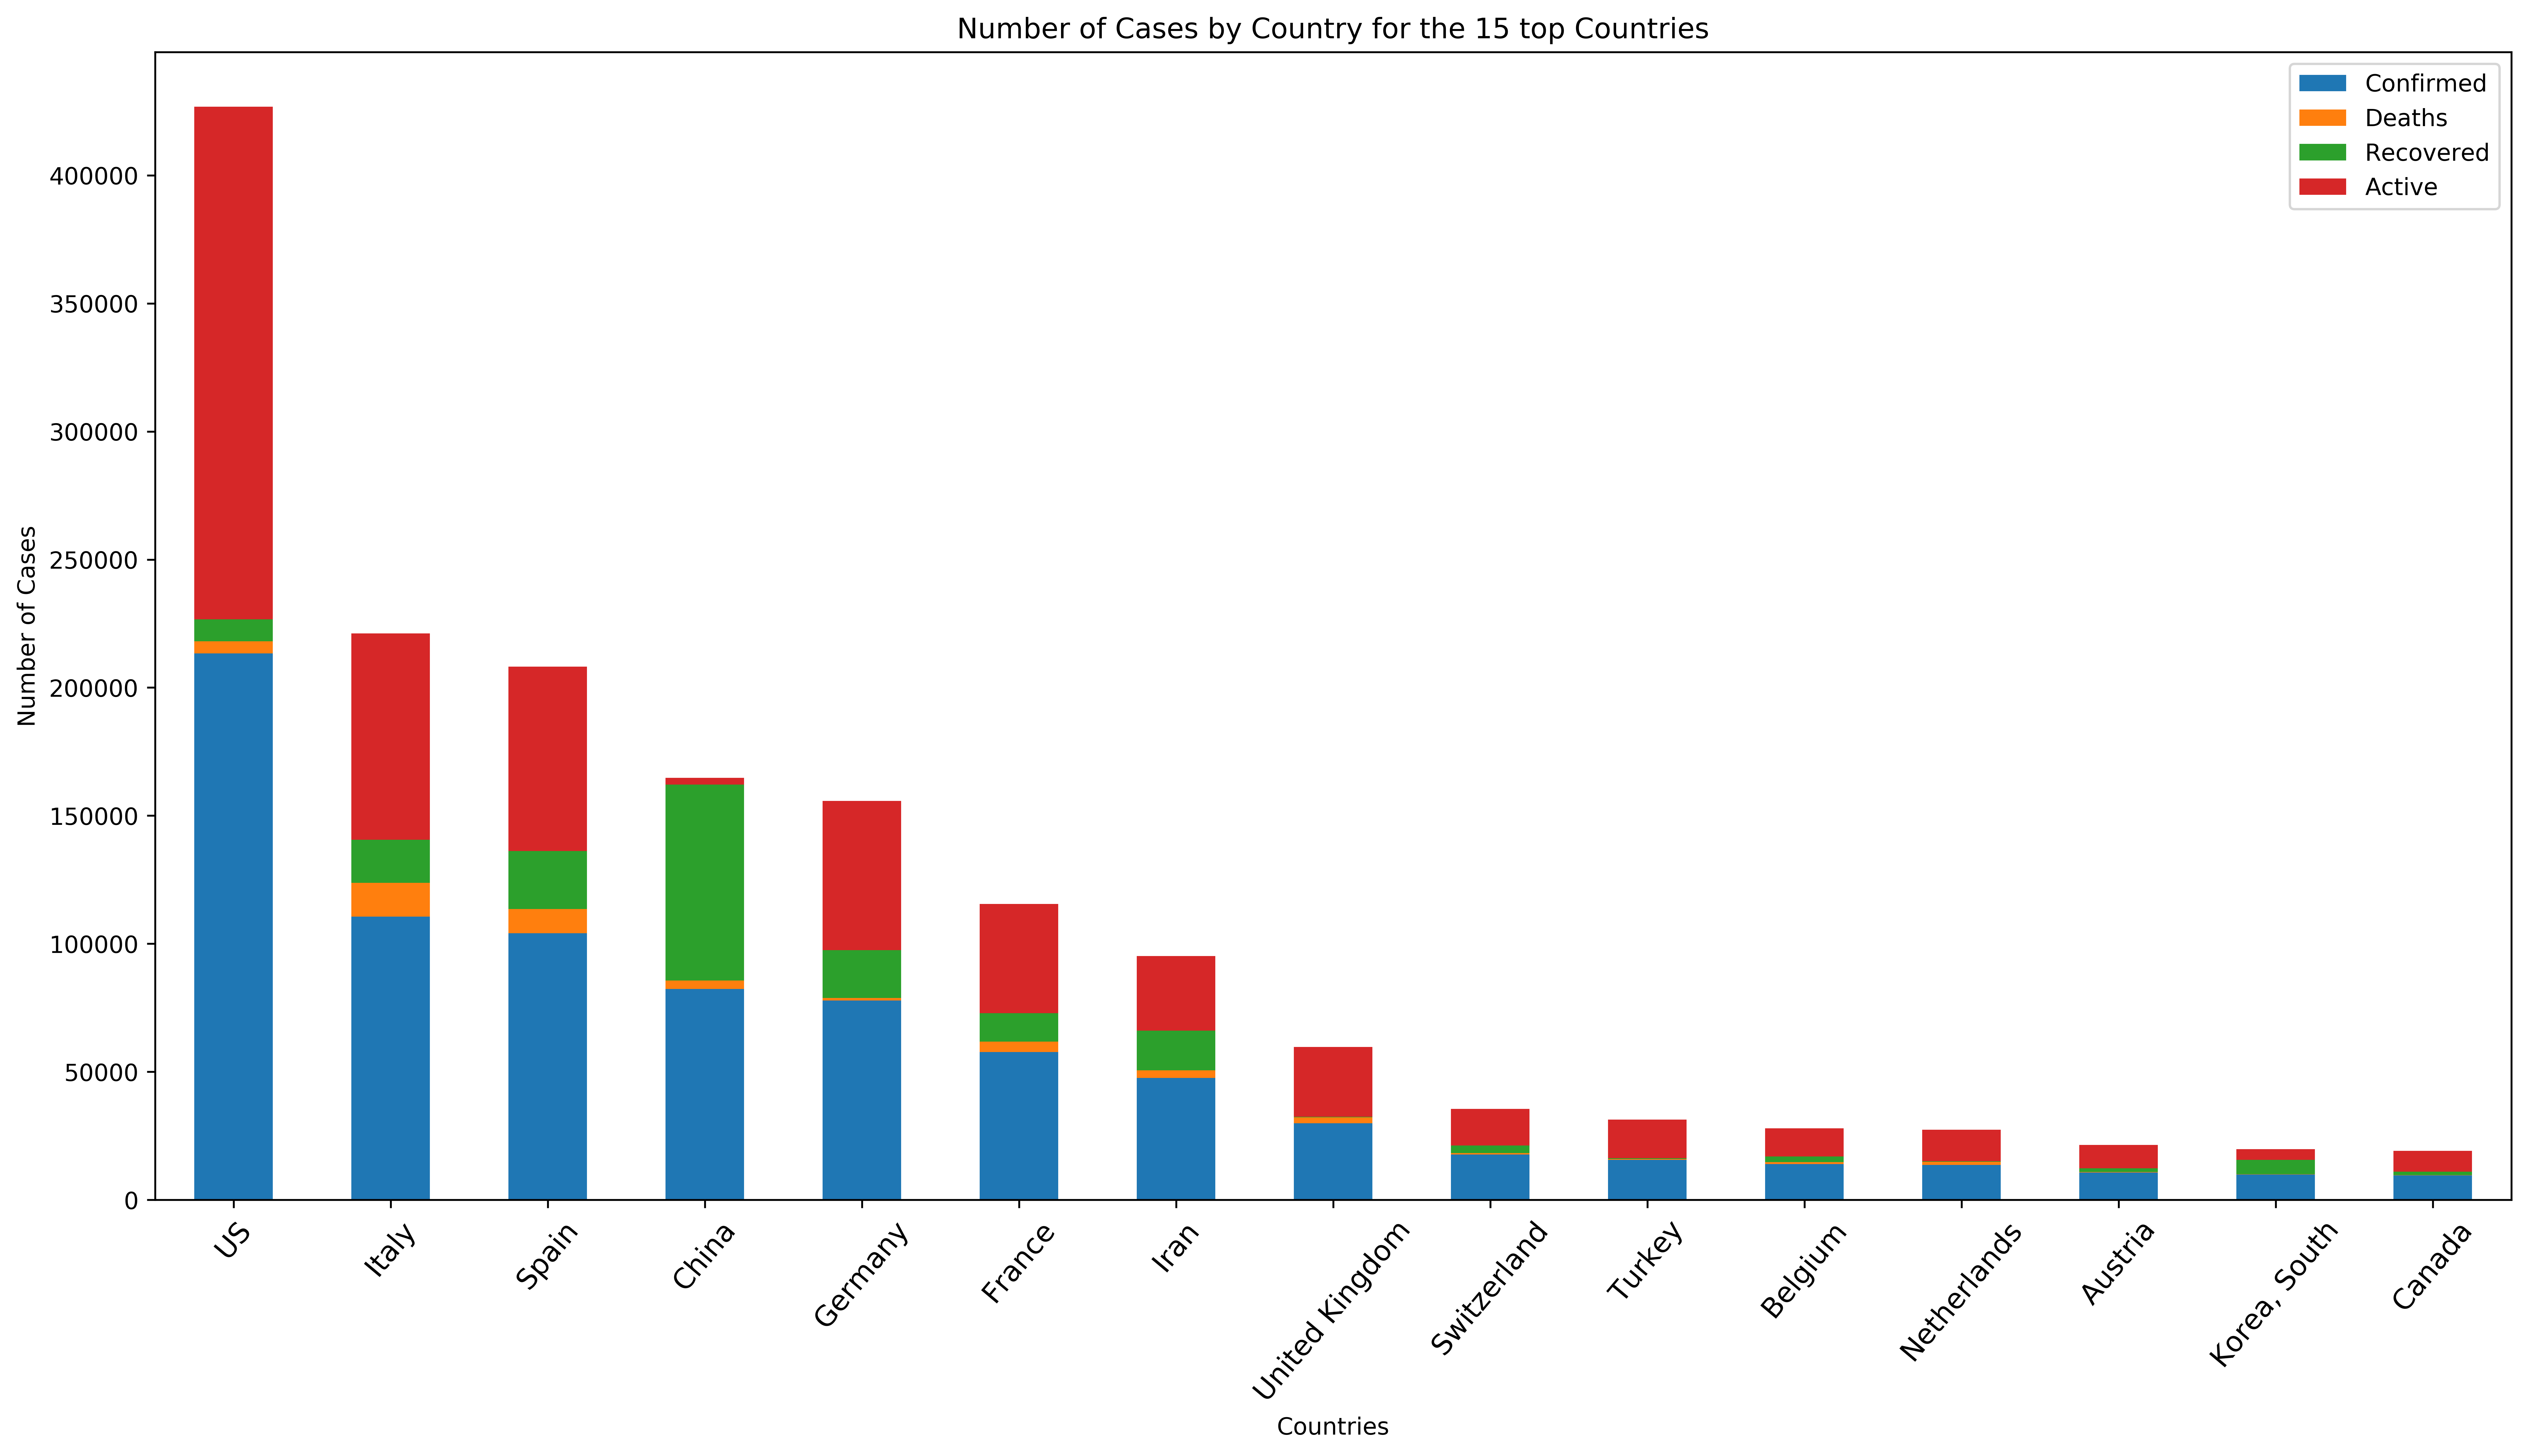

In [17]:
# generate stacked histogram
df_countries_top15.plot(kind='bar', figsize=(18, 9), stacked=True)
plt.title('Number of Cases by Country for the 15 top Countries')
plt.ylabel('Number of Cases')
plt.xlabel('Countries')
plt.xticks(rotation=50, size=12)
plt.show()

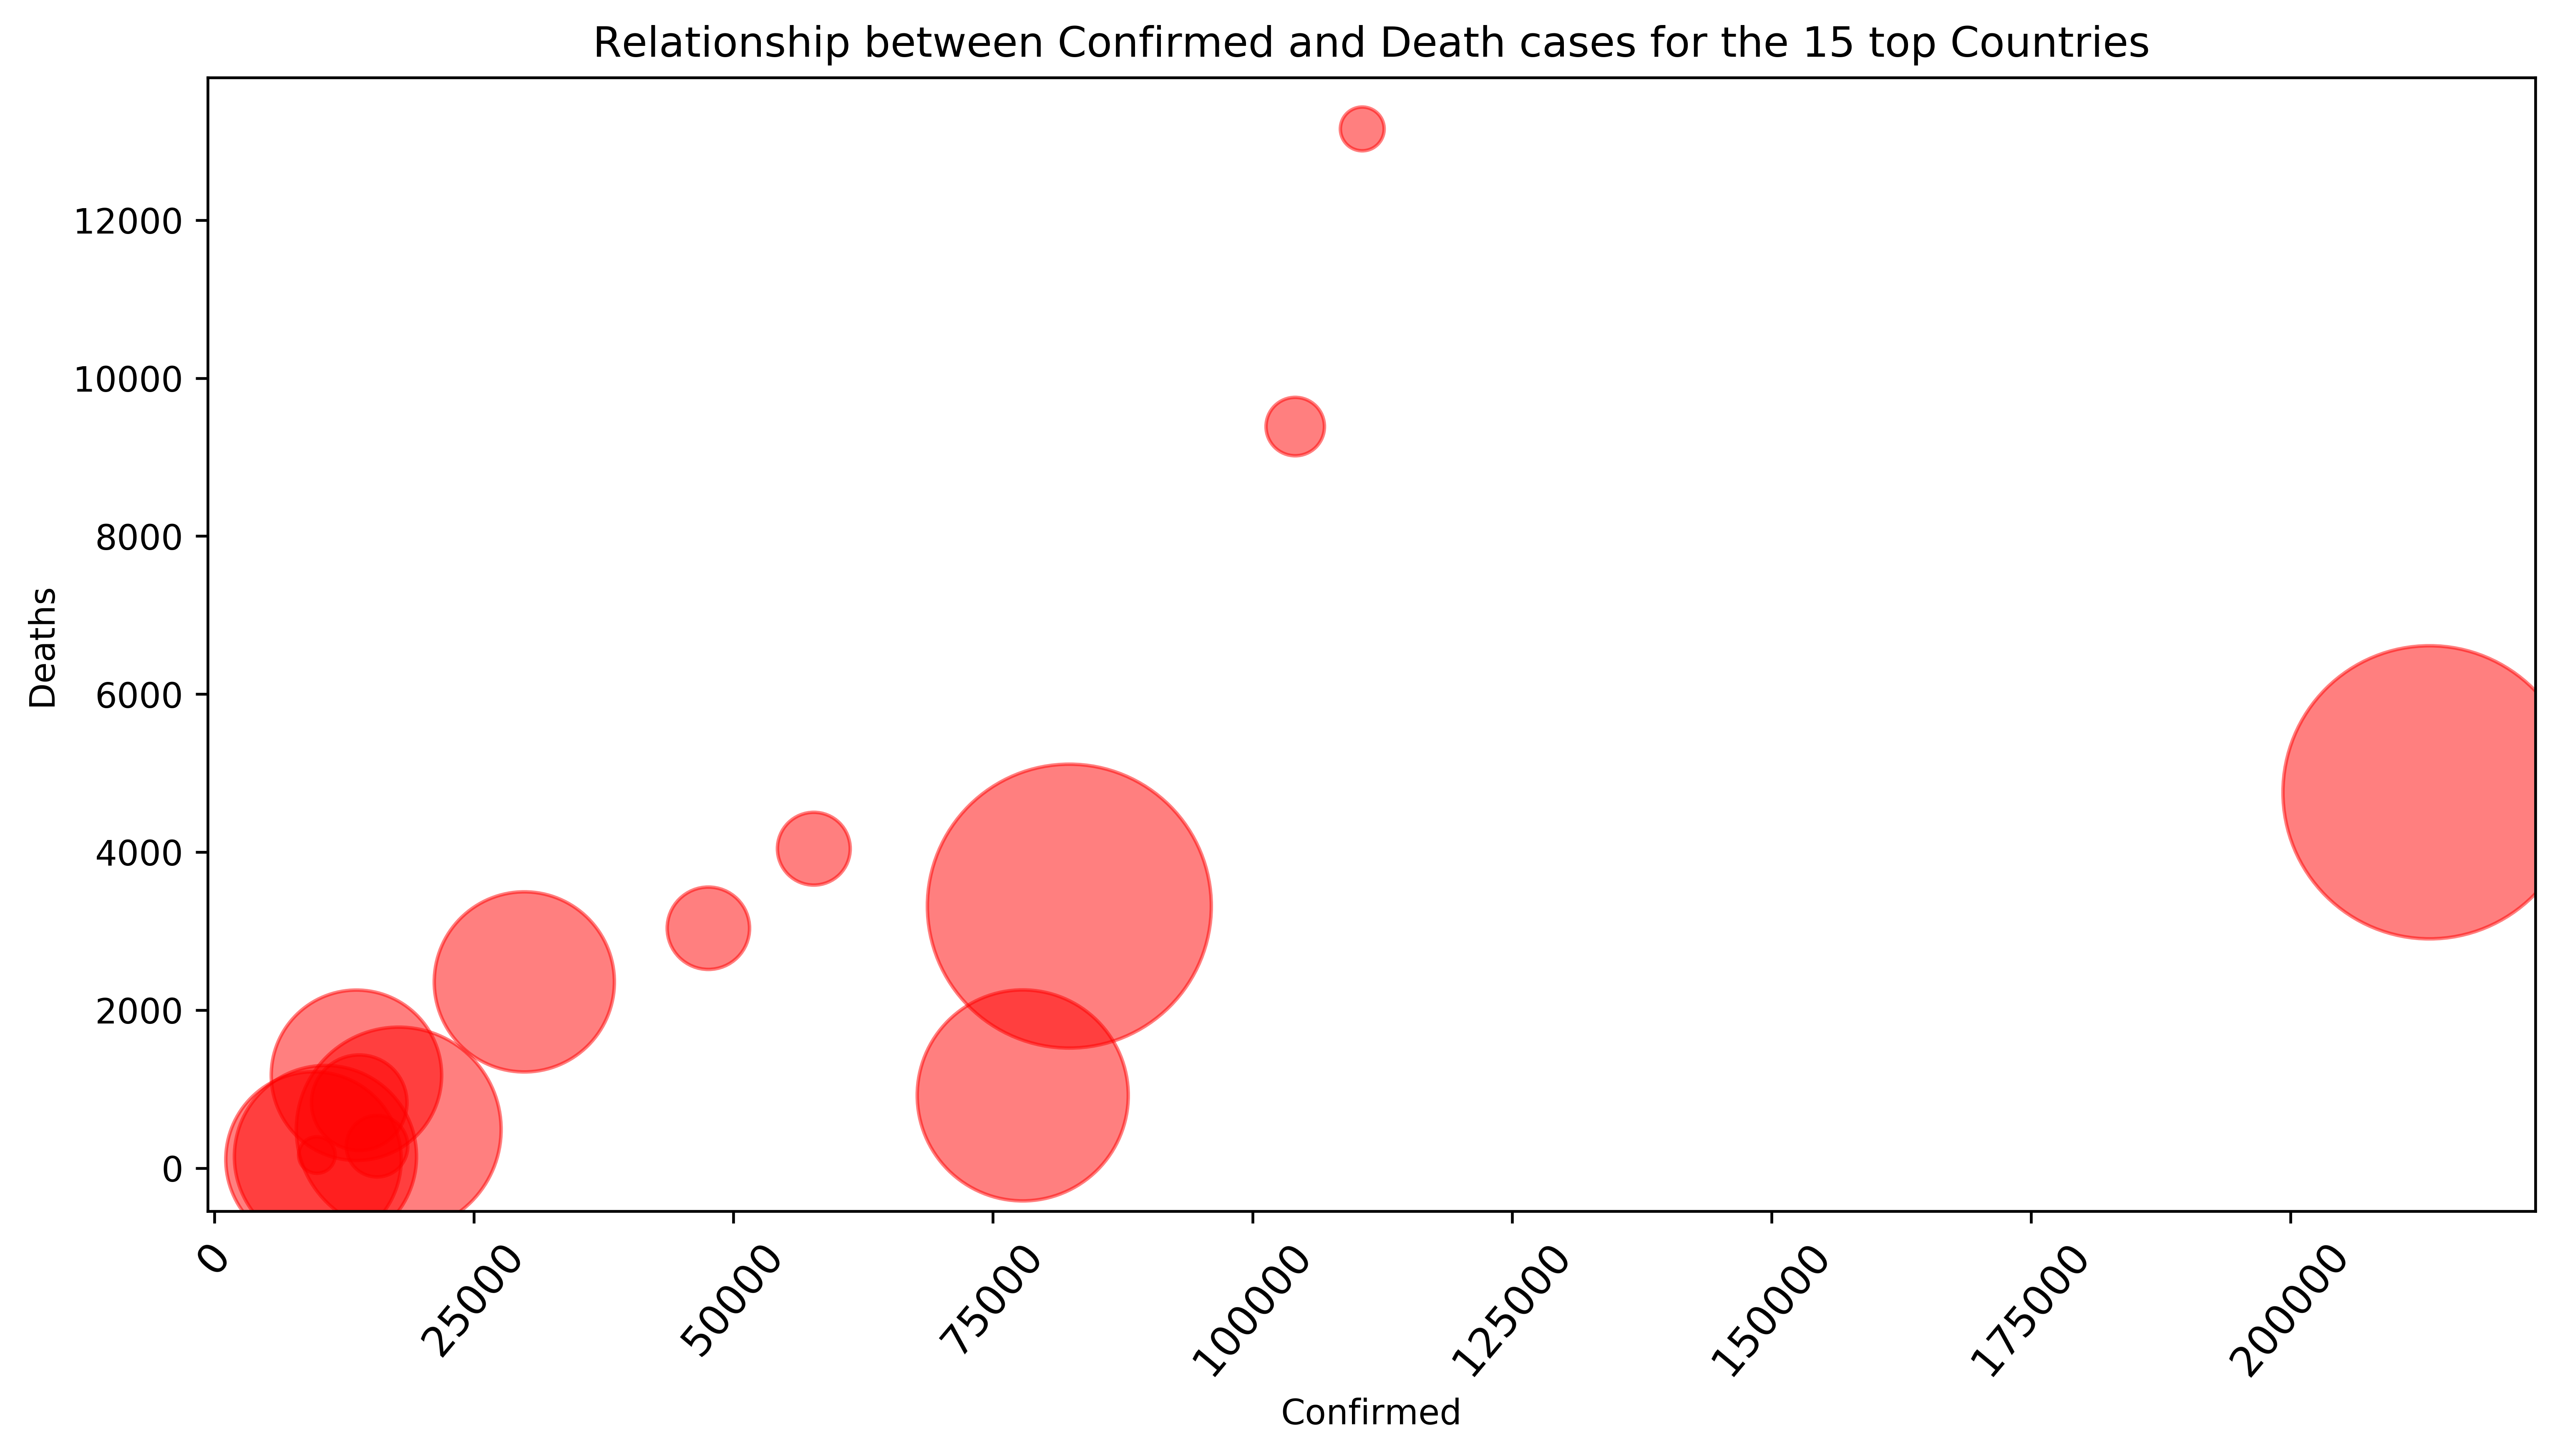

In [18]:
# generate scatter plot
df_countries_top15.plot(kind='scatter' ,x='Confirmed',y='Deaths', alpha=0.5,color='red', figsize=(12, 6), s=df_countries_top15 /30)
plt.title('Relationship between Confirmed and Death cases for the 15 top Countries')
plt.ylabel('Deaths')
plt.xlabel('Confirmed')
plt.xticks(rotation=50, size=12)
plt.show()

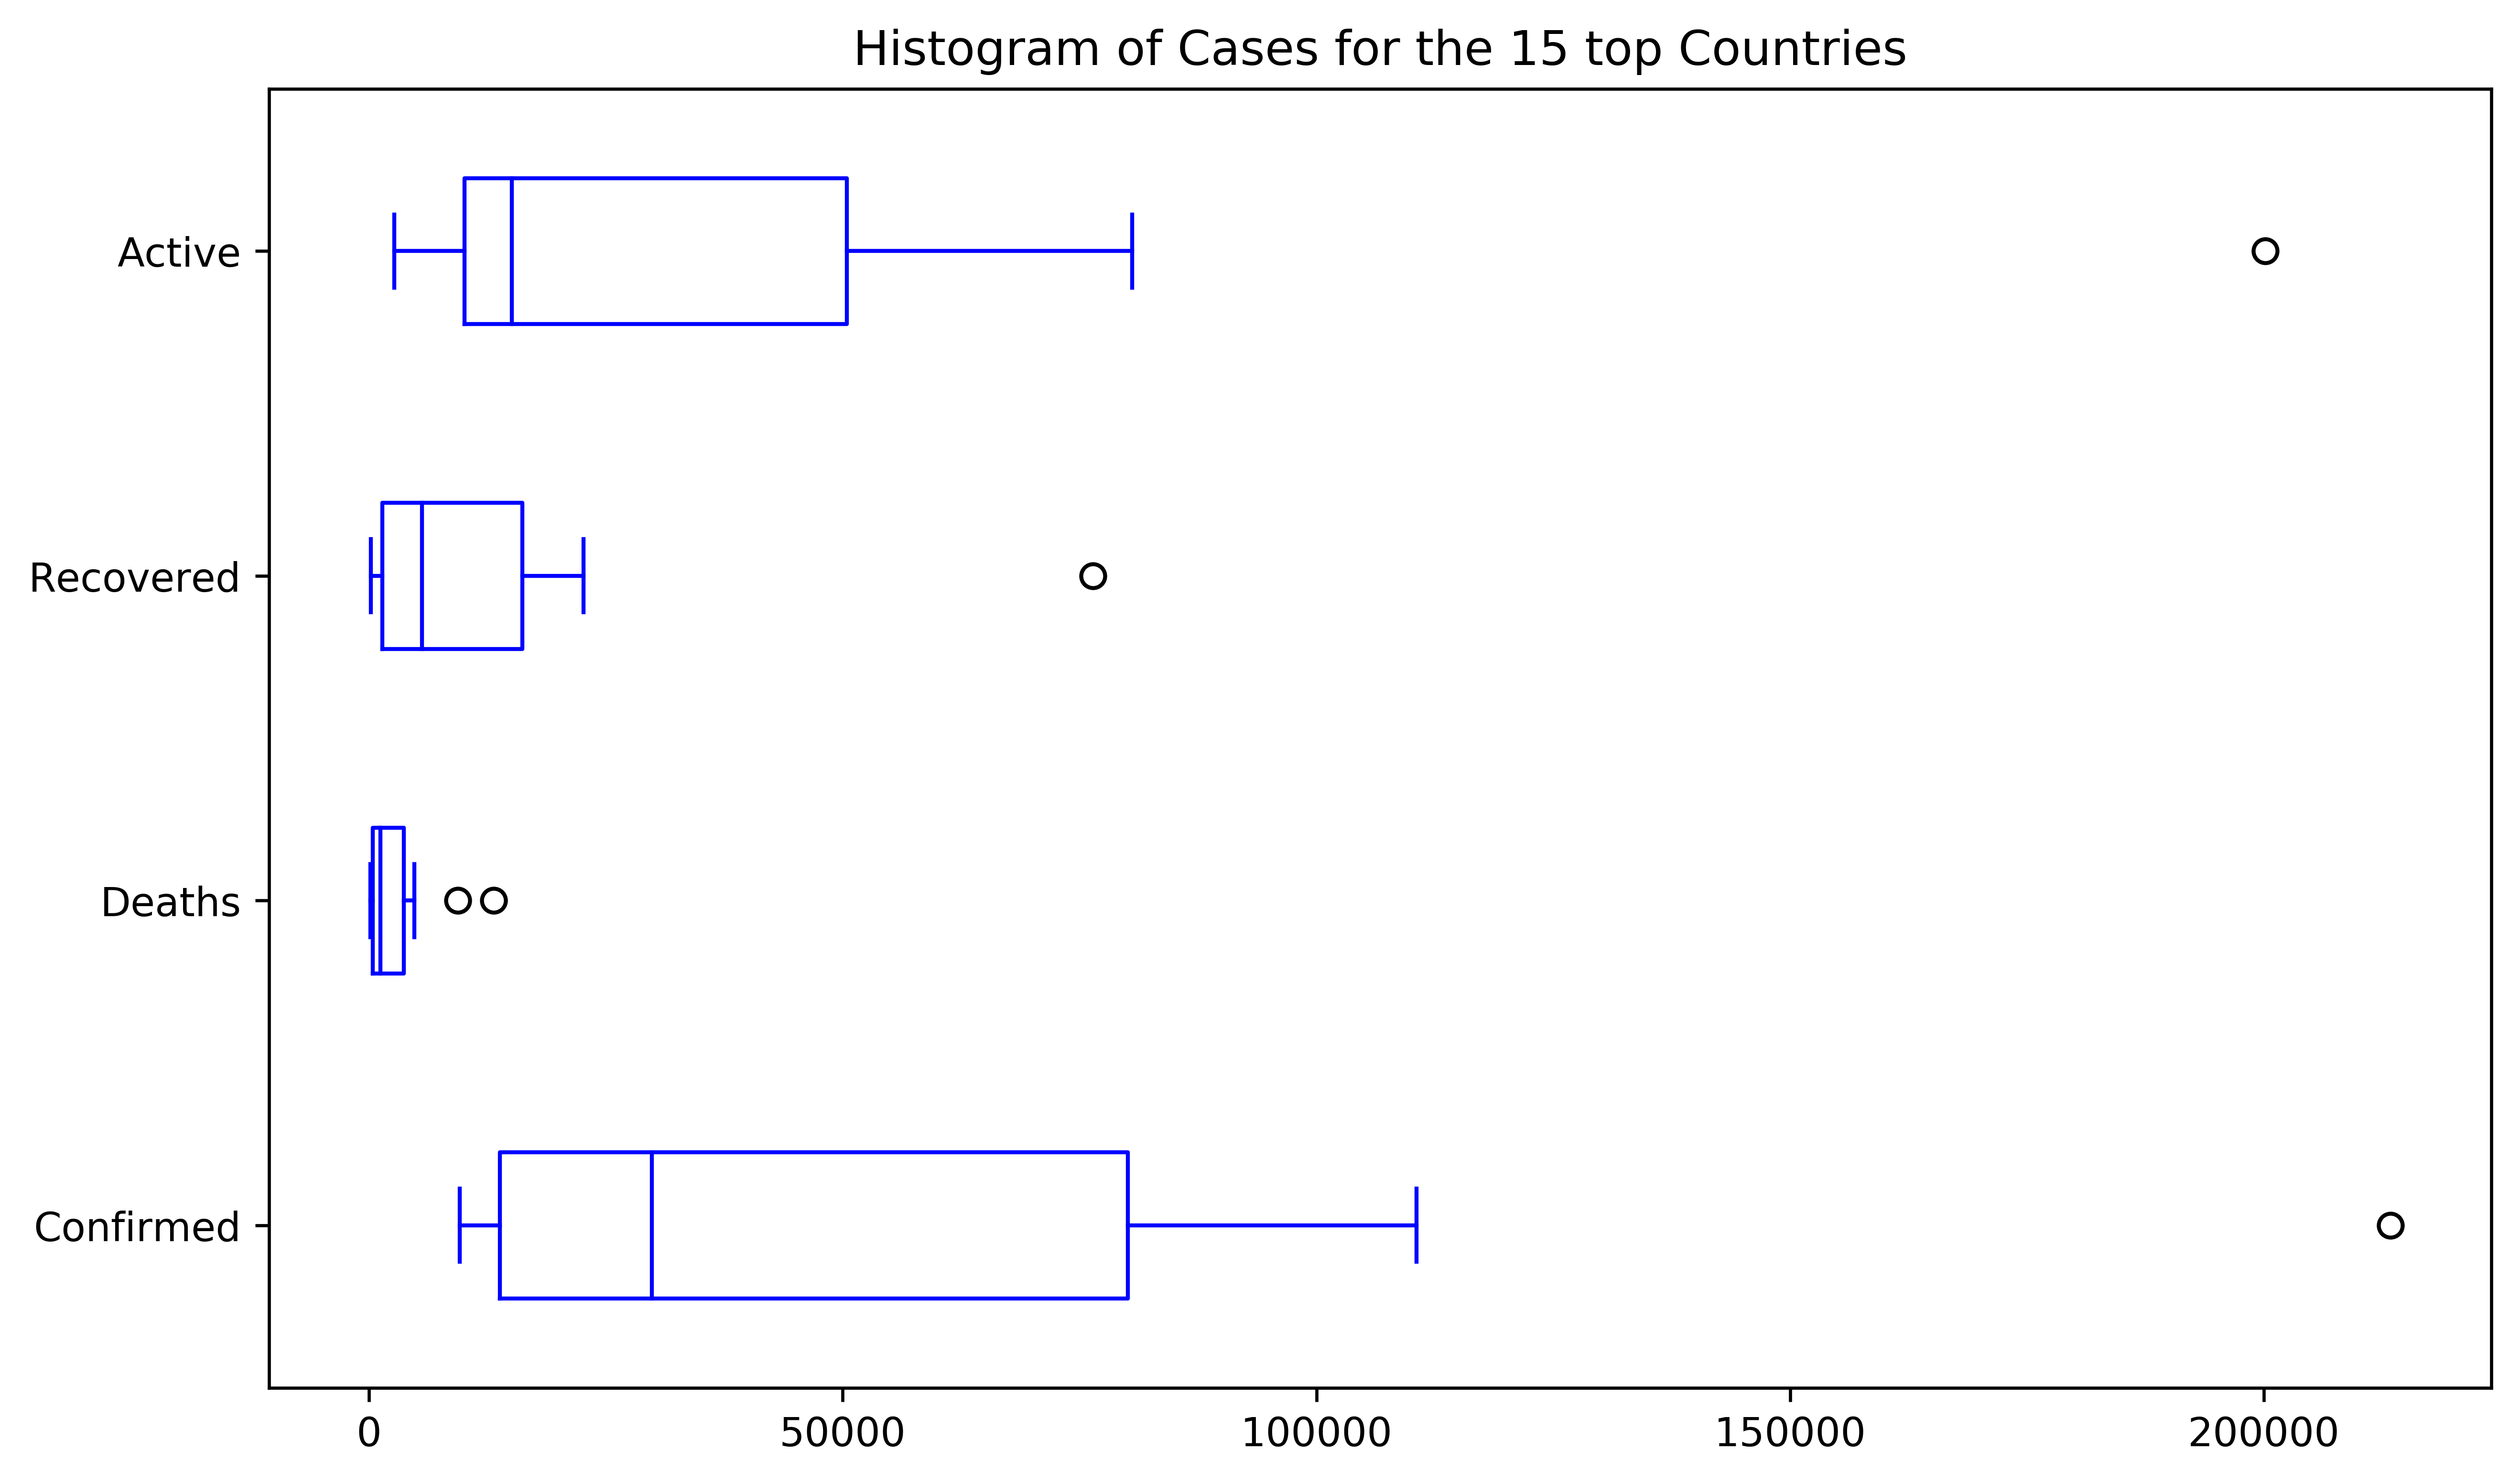

In [19]:
# let's create a boxplot  for graphically depicting groups of numerical data through their quartiles
count = np.histogram(df_countries_top15, 15)
# un-stacked histogram
df_countries_top15.plot(kind ='box', 
          figsize=(10, 6),
          color='blue', vert=False
         )
plt.title('Histogram of Cases for the 15 top Countries')
plt.show()

In [32]:
df_countries_top15_grouped = df_countries_top15.groupby(['Country_Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum()
df_countries_top15_grouped = df_countries_top15_grouped.reset_index()

In [33]:
###Countries with less Active cases
temp2 = df_countries_top15_grouped[df_countries_top15_grouped['Active']==0]
temp2 = df_countries_top15_grouped[['Country_Region', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
temp2 = df_countries_top15_grouped.sort_values('Active', ascending=True)
temp2.style.background_gradient(cmap='Blues')

In [35]:
import folium  ### library to create map

In [36]:
### Plot all cases in a WorldMap
world_map = folium.Map(location=[10, -20], tiles='cartodbpositron', 
               min_zoom=1, max_zoom=4, zoom_start=1.5)

for i in range (0, len(df)):
    
    folium.CircleMarker(location=[df.iloc[i]['Lat'], df.iloc[i]['Long_']], 
                      popup='<strong>Country: </strong>'+ str(df['Combined_Key'][i])+
                      '\n<strong>Confirmed: </strong>'+ str(df['Confirmed'][i])+
                      '\n<strong>Deaths: </strong>'+ str(df['Deaths'][i])+
                      '\n<strong>Recovered: </strong>'+ str(df['Recovered'][i]),
                       radius=1,
                       color='red',
                       fill=True,
                       fill_color='red').add_to(world_map)
world_map

In [37]:
def generateBaseMap(default_location=[10, -20], default_zoom_start=2):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [38]:
### Plot all cases in a Heat WorldMap
from folium.plugins import HeatMap
df['count'] = 1
base_map = generateBaseMap()
HeatMap(data=df[['Lat', 'Long_', 'count']].groupby(['Lat', 'Long_']).sum().reset_index().values.tolist(), radius=8, max_zoom=7).add_to(base_map)

In [39]:
base_map